In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [4]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [5]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [6]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 29s 8ms/step - loss: 0.2348 - accuracy: 0.9302 - val_loss: 0.0926 - val_accuracy: 0.9714
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0915 - accuracy: 0.9721 - val_loss: 0.0643 - val_accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0286 - val_accuracy: 0.9924


In [8]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.0486 - accuracy: 0.9842


[0.04864949733018875, 0.9842000007629395]

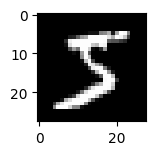

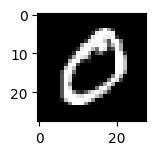

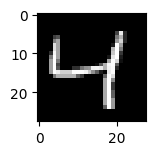

In [9]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [10]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model\assets


INFO:tensorflow:Assets written to: lenet_5_model\assets


['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [11]:
lenet_5_model.save("my.h5")

In [12]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
json_model = lenet_5_model.to_json()

In [14]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [21]:
lenet_5_model.save_weights('weights.ckpt')

In [ ]:
# 从 checkpoint 文件加载模型权重
lenet_5_model.load_weights('weights.ckpt')

# 获取所有权重张量的名称
weights = lenet_5_model.weights
weight_names = [weight.name for weight in weights]

In [30]:
weight_names

['conv2d/kernel:0',
 'conv2d/bias:0',
 'conv2d_1/kernel:0',
 'conv2d_1/bias:0',
 'dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0',
 'dense_2/kernel:0',
 'dense_2/bias:0']

In [48]:
# 使用 Python 的 open 函数创建一个 txt 文件
with open('weights.txt', 'w') as f:
  # 遍历权重张量
  for i in range(len(lenet_5_model.layers)):
    # 获取权重张量的值
   
    weight_value = lenet_5_model.layers[i].get_weights()

    # 将权重张量的名称和值写入文件
    
    f.write(str(weight_value) + '\n')

In [46]:
len(lenet_5_model.layers)

8

In [45]:
lenet_5_model.layers[0].get_weights()

[array([[[[ 1.08227760e-01,  1.05966873e-01, -6.45524114e-02,
            1.80297121e-02,  3.05476636e-01,  5.04808016e-02]],
 
         [[-6.34455085e-01,  1.00915946e-01,  1.14728287e-01,
           -2.46795844e-02,  1.23239055e-01, -2.07327724e-01]],
 
         [[-3.17345828e-01, -2.80886404e-02,  2.88306326e-01,
            2.92748779e-01,  3.45834672e-01, -6.33070990e-02]],
 
         [[-1.96718544e-01,  1.11604244e-01,  1.31374404e-01,
            3.95033509e-02,  3.08705330e-01, -3.48987669e-01]],
 
         [[ 2.99523443e-01, -5.89050874e-02,  3.03947419e-01,
            7.89149925e-02,  3.04306149e-01,  6.84375316e-02]]],
 
 
        [[[-2.89741784e-01, -1.66871790e-02, -3.39259505e-01,
            2.55435407e-01,  1.39432222e-01, -2.33403355e-01]],
 
         [[-7.43997157e-01,  1.00821145e-01, -1.93178341e-01,
            3.80145043e-01,  2.98320889e-01, -4.79570478e-01]],
 
         [[-4.32587534e-01, -2.17100885e-02, -9.27483141e-02,
            2.78993100e-01,  1.67974010